In [9]:
script.parser.parse_args(args="--gpu=1")

usage: ipykernel_launcher.py [-h] [--epochs EPOCHS]
                             [--num-workers NUM_WORKERS]
                             [--batch-size BATCH_SIZE] [--gpus GPUS] [--lr LR]
ipykernel_launcher.py: error: unrecognized arguments: - - g p u = 1


SystemExit: 2

In [1]:
import torch
import matplotlib.pyplot as plt
import pytorch_lightning as pl

import scripts.dataset.cifar as script

# Reload python packages when changed
%load_ext autoreload
%autoreload 2

# Matplotlib defaults
plt.rcParams.update({
    "font.size": 25,
    "figure.figsize": (25, 5)
})

exp = script.Experiment(script.parser.parse_args(["--gpus", "2,"]))

Using logger <aim.sdk.adapters.pytorch_lightning.AimLogger.__get_logger_cls.<locals>._PytorchLightningLogger object at 0x7fedea9f95b0>.


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [3]:
# Load validation dataset
exp.datamodule.setup()
dataloader_val  = exp.datamodule.val_dataloader()

# Load model from checkpoint
litmodule = exp.litmodule.load_from_checkpoint("checkpoints/vqvae-cifar/2022_02_02__111607.ckpt", model=exp.litmodule.model)

Files already downloaded and verified
Files already downloaded and verified


## Reconstructions

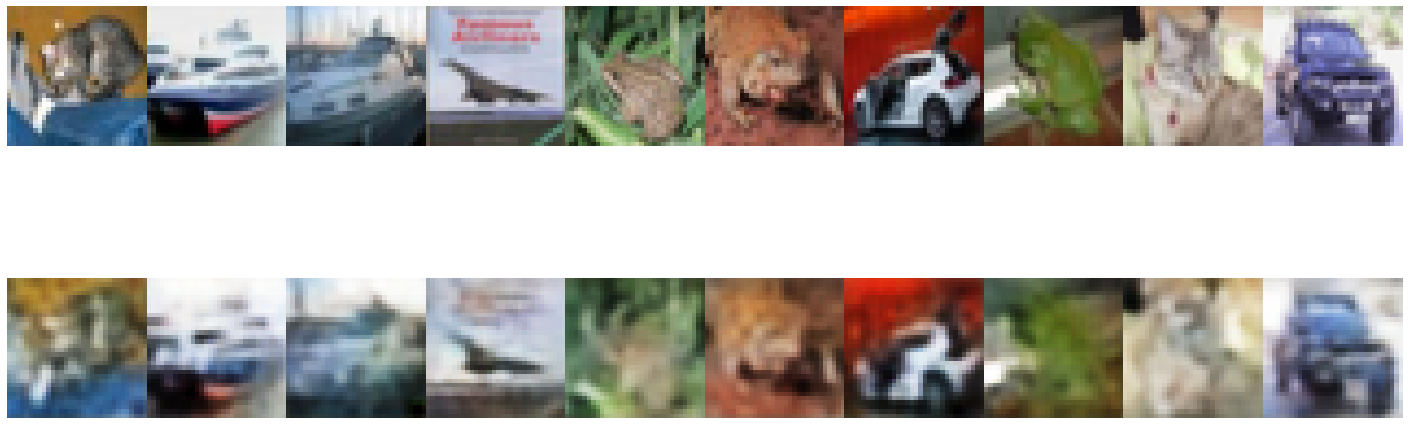

In [4]:
n_images = 10

for images in dataloader_val:
    break
images = images[:n_images]
with torch.no_grad():
    reconstructions = litmodule.model(images)
    
# fig, axes = plt.subplots(nrows=2, ncols=n_images)
fig = plt.figure(figsize=(25, 10))
for idx, (image, reconstruction) in enumerate(zip(images, reconstructions)):
    plt.subplot(2, n_images, idx+1)
    plt.imshow(image.permute(1, 2, 0))
    plt.axis("off")
    
    plt.subplot(2, n_images, n_images+idx+1)
    plt.imshow(reconstruction.permute(1, 2, 0))
    plt.axis("off")

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [5]:
exp.trainer.validate(litmodule, dataloader_val)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4]
/space/homes/maxcohen/vqvae/vqvae/.env/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:132: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Validating: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{'val_reconstruction_loss': 0.004293445032089949}
--------------------------------------------------------------------------------


[{'val_reconstruction_loss': 0.004293445032089949}]